In [1]:
%%time
import cv2
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import noise
import math

from mesh import Mesh
from atlas import Atlas


%matplotlib inline
%config InlineBackend.figure_format = 'png'

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20

MAP_SIZE = 1024
DOTS_DENSITY = 0.009

DOTS_AMOUNT = int(MAP_SIZE * MAP_SIZE * DOTS_DENSITY)
print("DOTS_AMOUNT =", DOTS_AMOUNT)

DOTS_AMOUNT = 9437
Wall time: 241 ms


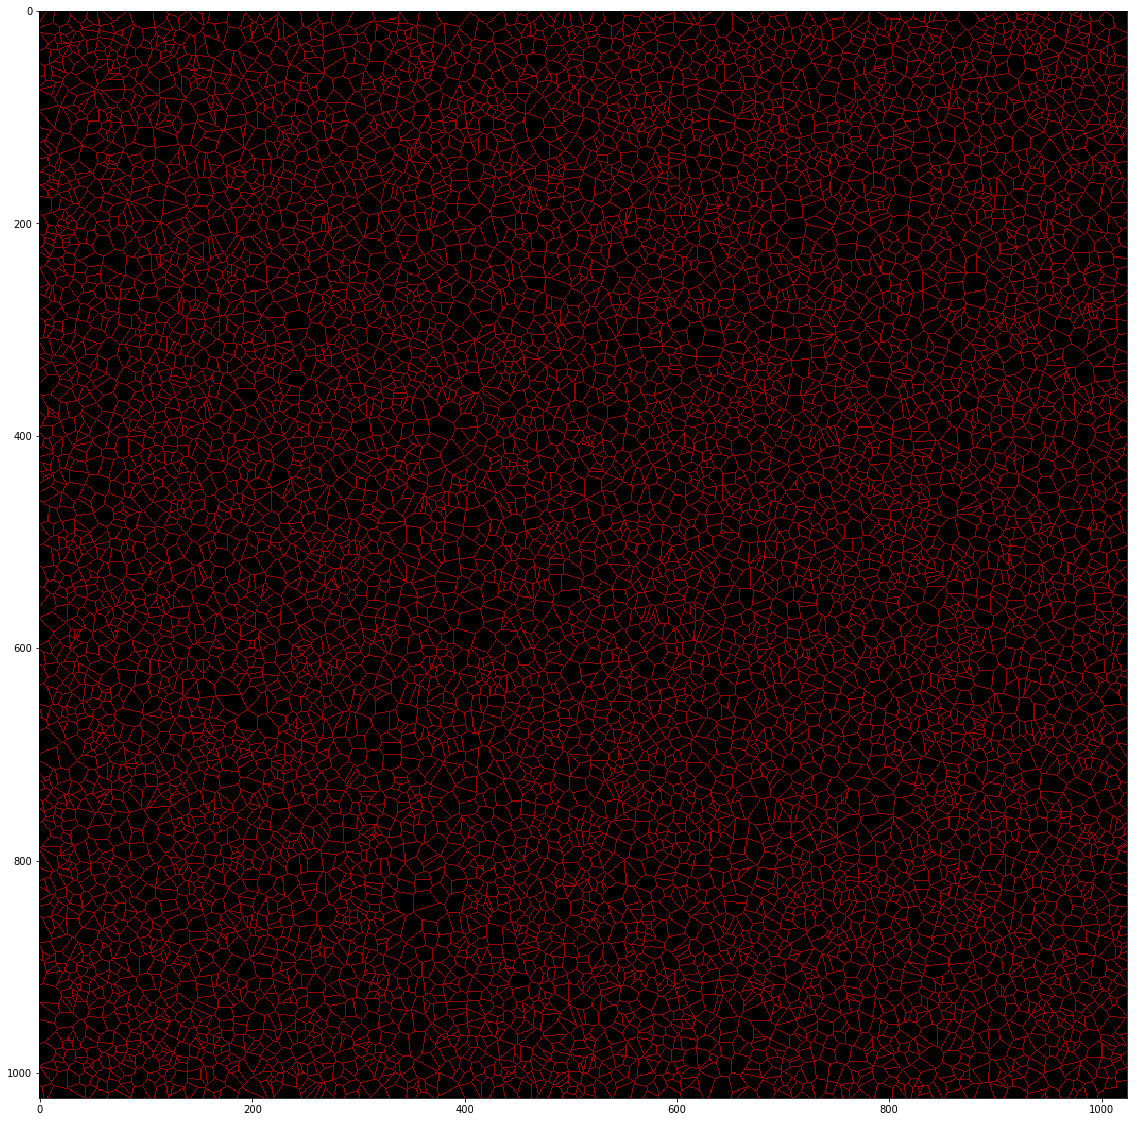

In [2]:
%%time

atlas = Atlas(dimensions=(MAP_SIZE, MAP_SIZE), granularity=DOTS_AMOUNT)
vor = atlas.generate_voronoi()


img = np.zeros((MAP_SIZE, MAP_SIZE, 3), np.uint8)
# Voronoi
for i in range(len(vor.ridge_vertices)):
    if vor.ridge_vertices[i][0] < 0:
        continue
    coordinates = vor.vertices[vor.ridge_vertices[i]]
    cv2.line(img, tuple(coordinates[0].astype(int)), tuple(coordinates[1].astype(int)), (153, 0, 0), 1)

# Delaunay
# for i in range(len(mesh.ridge_points)):
    # if mesh.ridge_points[i][0] < 0:
    #     continue
    # coordinates = mesh.points[mesh.ridge_points[i]]
    # cv2.line(img, tuple(coordinates[0].astype(int)), tuple(coordinates[1].astype(int)), (0, 0, 102), 1)

plt.imshow(img)
plt.show()

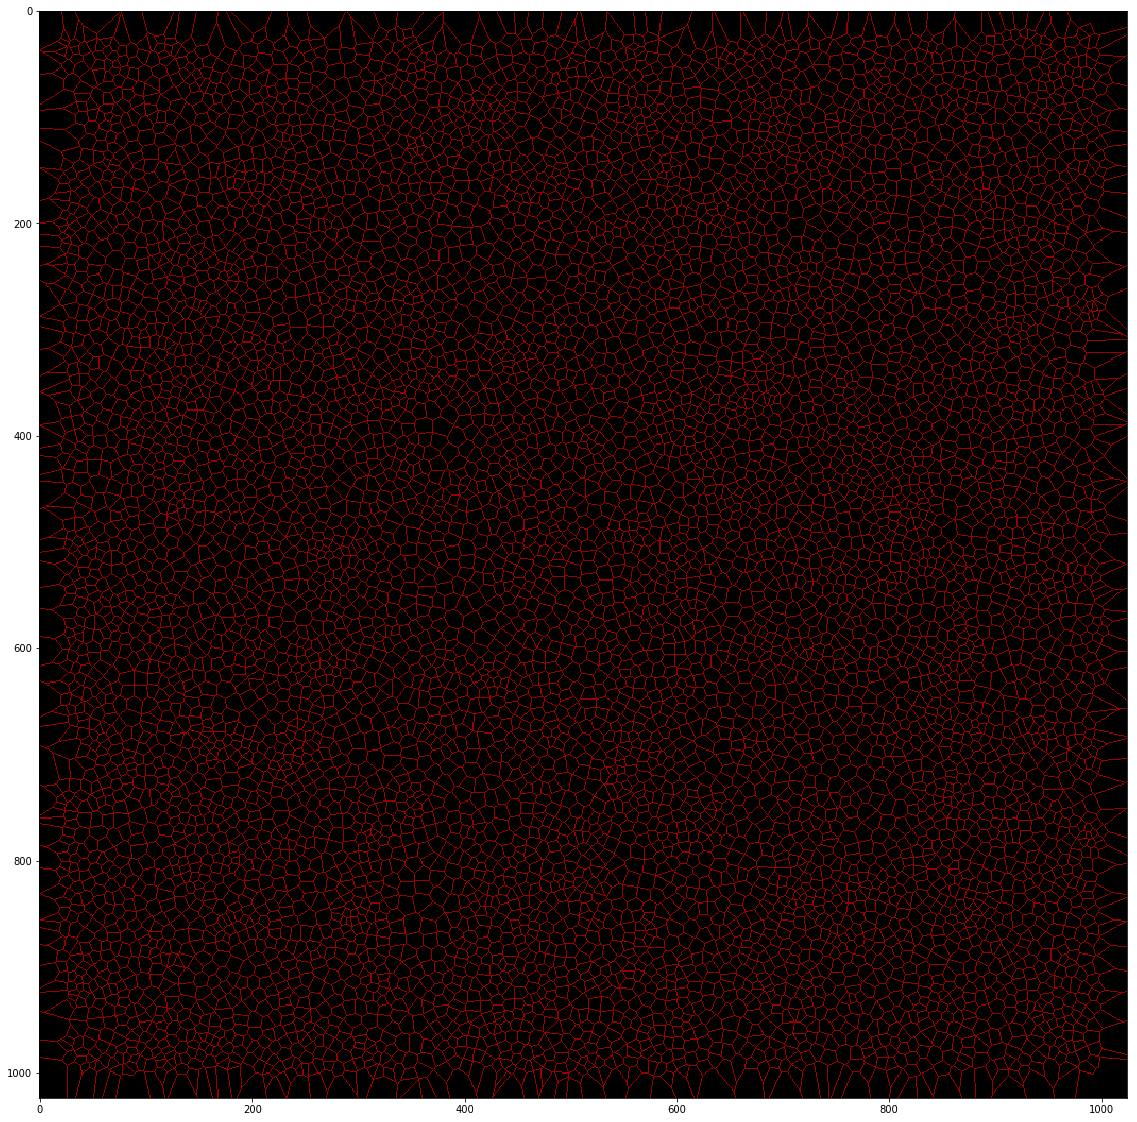

Wall time: 2.12 s


In [3]:
%%time

vor = atlas.relax_points(times=2)

img = np.zeros((MAP_SIZE, MAP_SIZE, 3), np.uint8)

# Voronoi
for i in range(len(vor.ridge_vertices)):
    if vor.ridge_vertices[i][0] < 0:
        continue
    coordinates = vor.vertices[vor.ridge_vertices[i]]
    cv2.line(img, tuple(coordinates[0].astype(int)), tuple(coordinates[1].astype(int)), (153, 0, 0), 1)

# Delaunay
# for i in range(len(mesh.ridge_points)):
#     if mesh.ridge_points[i][0] < 0:
#         continue
#     coordinates = mesh.points[mesh.ridge_points[i]]
#     cv2.line(img, tuple(coordinates[0].astype(int)), tuple(coordinates[1].astype(int)), (0, 0, 102), 1)

plt.imshow(img)
plt.show()

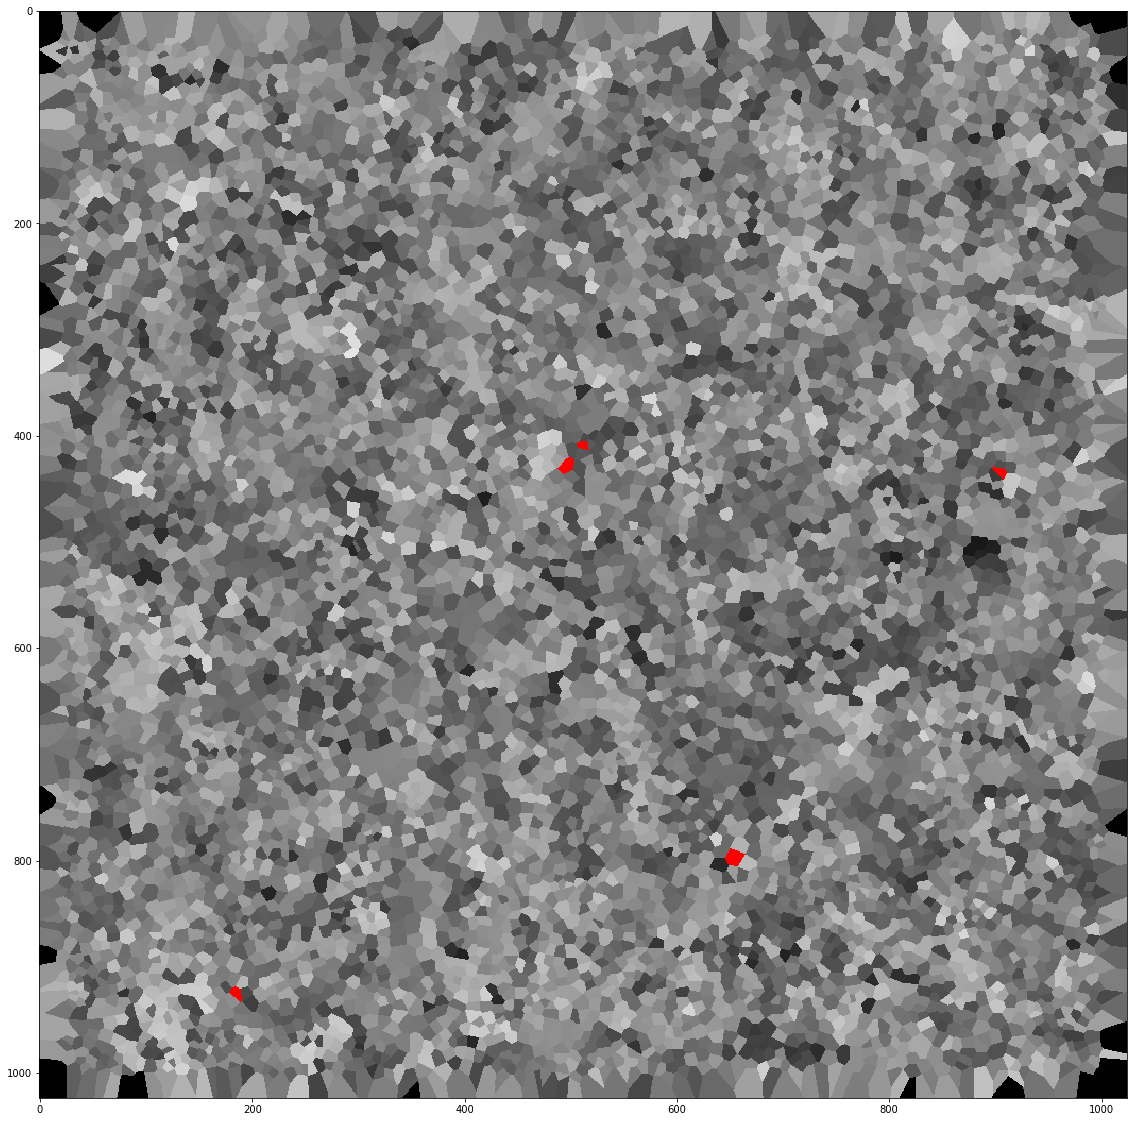

In [5]:
%%time

img = np.zeros((MAP_SIZE, MAP_SIZE, 3), np.uint8)

mesh = Mesh(vor)
mesh.create_noise()


def create_tectonic_plates(mesh: Mesh, n: int):
    regions = np.random.choice(mesh.point_region, n, replace=False)
    # todo: random flood fill
    return regions


plates = create_tectonic_plates(mesh, 5)

for i in range(len(mesh.regions)):
    if -1 in mesh.regions[i]:
        continue

    coordinates = mesh.vertices[mesh.regions[i]]
    lvl = mesh.noise[i] * 255
    cv2.fillConvexPoly(img, coordinates.astype('int32'), (lvl, lvl, lvl))

for i in plates:
    coordinates = mesh.vertices[mesh.regions[i]]
    cv2.fillConvexPoly(img, coordinates.astype('int32'), (255, 0, 0))

plt.imshow(img)
plt.show()

a
b


c
d


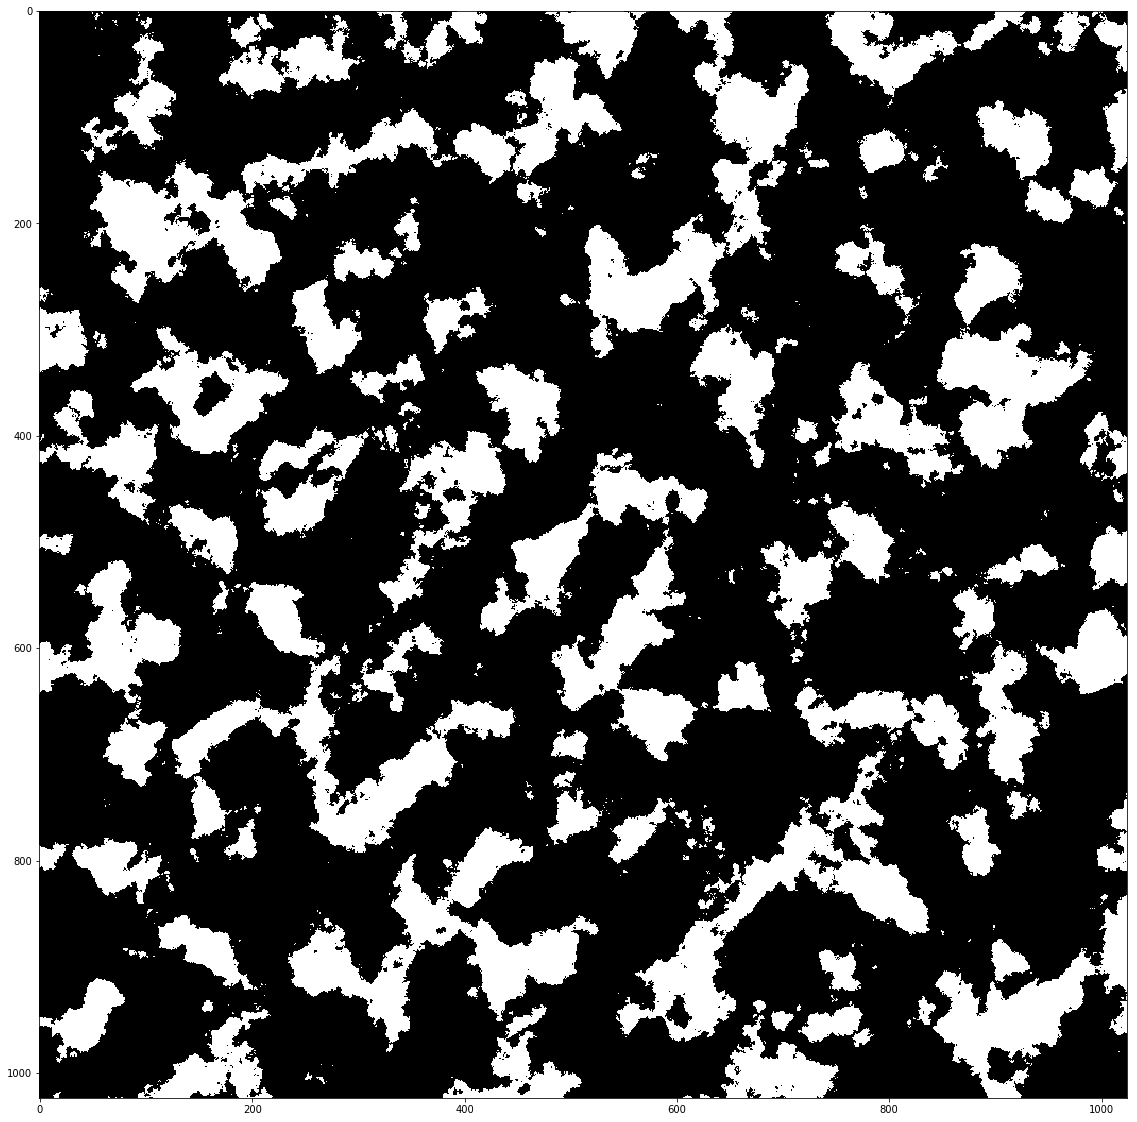

Wall time: 4.21 s


In [71]:
%%time

scale = 128.0
octaves = 16
persistence = 0.6
lacunarity = 1.9
levl = 0.40

colormap = LinearSegmentedColormap(
    'TerrainCmap', {
        'red': (
            (0.00, 0.00, 0.00),
            (levl, 0.00, 1.00),
            (1.00, 1.00, 1.00),
        ),

        'green': (
            (0.00, 0.00, 0.00),
            (levl, 0.00, 1.00),
            (1.00, 1.00, 1.00),
        ),

        'blue': (
            (0.00, 0.00, 0.00),
            (levl, 0.00, 1.00),
            (1.00, 1.00, 1.00),
        ),
    })

print('a')
img = np.zeros((MAP_SIZE, MAP_SIZE), np.float32)
print('b')
for i in range(MAP_SIZE):
    for j in range(MAP_SIZE):
        val = noise.snoise2(i / scale,
                            j / scale,
                            octaves=octaves,
                            persistence=persistence,
                            lacunarity=lacunarity,
                            base=0)
        img[i][j] = ((val + 1) / 2.0)**2
print('c')
plt.imshow(img, cmap=colormap)
print('d')
plt.show()